# How does player height and weight correlate with performance stats?

### Methodology

1. Convert Height String to Float
2. Break up Weight into 3 Categories
3. Create Fig Ax Display with 6 Lineplots for the 3 Stat Categories and Height and Weight

## Import Libraries and Data

In [46]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data
df1 = pd.read_excel('nba_player_data.xlsx')
df2 = pd.read_csv('PlayerIndex_nba_stats.csv')

# Merging the DataFrames
df2 = df2.rename(columns={'PERSON_ID': 'PLAYER_ID'})
df = pd.merge(df1, df2, on='PLAYER_ID', how='left')

# Data Cleaning
df.drop(columns=['RANK'], inplace=True)
df['season_start_year'] = df['Year'].str[:4].astype(int)
df['TEAM'] = df['TEAM'].replace(to_replace=['NOP','NOH'], value='NO')
df['Season_type'] = df['Season_type'].replace('Regular%20Season','Regular Season')

# Create Per Game Average Columns
df['PPG'] = df['PTS_x'] / df['GP']
df['RPG'] = df['REB_x'] / df['GP']
df['APG'] = df['AST_x'] / df['GP']
df['SPG'] = df['STL'] / df['GP'] 
df['BPG'] = df['BLK'] / df['GP']

## Convert the Height Column from Strings to Float

In [ ]:
# Define a function to convert the HEIGHT column from a string format of "feet-inches" to a float representing feet and inches
def convert_height(height_str):
    try:
        feet, inches = height_str.split('-')
        number = int(feet) + int(inches) / 12
        return round(number, 2)
    except:
        return None  # or np.nan

# Run the defined function on the HEIGHT column
df['HEIGHT'] = df['HEIGHT'].apply(convert_height)

## Create 3 Categories for the Weight Column

In [ ]:
# Create Weight Categories
df['WEIGHT_category'] = df['WEIGHT'].apply(lambda x: '<200' if x < 200 else ('200-240' if x < 240 else '>240'))

## Produce Fig Ax Plot

Text(0.5, 0.98, 'NBA Performance Stats by Height and Weight')

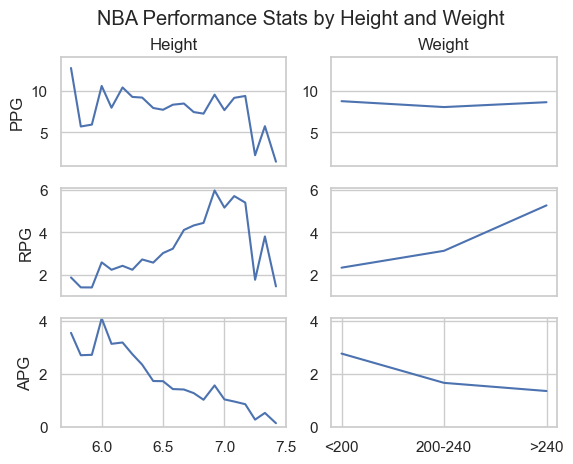

In [ ]:
# Define the performance stats to plot
per_stats = ['PPG', 'RPG', 'APG']

sns.set_theme(style='whitegrid')

# Define the figure and axes for the plots
fig, ax = plt.subplots(len(per_stats), 2)

# Create line plots for each of the performance stats against HEIGHT and WEIGHT
for i, stat in enumerate(per_stats):
    sns.lineplot(data=df, x='HEIGHT', y=stat, ax=ax[i, 0], errorbar=None)
    ax[i, 0].set_xlabel('')
    ax[i, 0].set_ylabel(stat)

    sns.lineplot(data=df, x='WEIGHT_category', y=stat, ax=ax[i, 1], errorbar=None)
    ax[i, 1].set_xlabel('')
    ax[i, 1].set_ylabel('')
    ax[i, 1].invert_xaxis()

# Set titles
ax[0, 0].set_title('Height')
ax[0, 1].set_title('Weight')

# Set axis limits
for axis in ax[0, 0:2]:
    axis.set_ylim(1, 14)

for axis in ax[1, 0:2]:
    axis.set_ylim(1, 6.1)

for axis in ax[2, 0:2]:
    axis.set_ylim(0, 4.1)

for axis in ax[0, :]:
    axis.get_xaxis().set_visible(False)

for axis in ax[1, :]:
    axis.get_xaxis().set_visible(False)

fig.suptitle('NBA Performance Stats by Height and Weight')